##**ADMISSION DATASET PREDICTION PROJECT USING XG BOOST**

### **WHAT IS XG BOOST?**

*XGBoost, short for eXtreme Gradient Boosting, is a powerful machine learning algorithm known for its efficiency, speed, and accuracy. It belongs to the family of boosting algorithms, which are ensemble learning techniques that combine the predictions of multiple weak learners.*



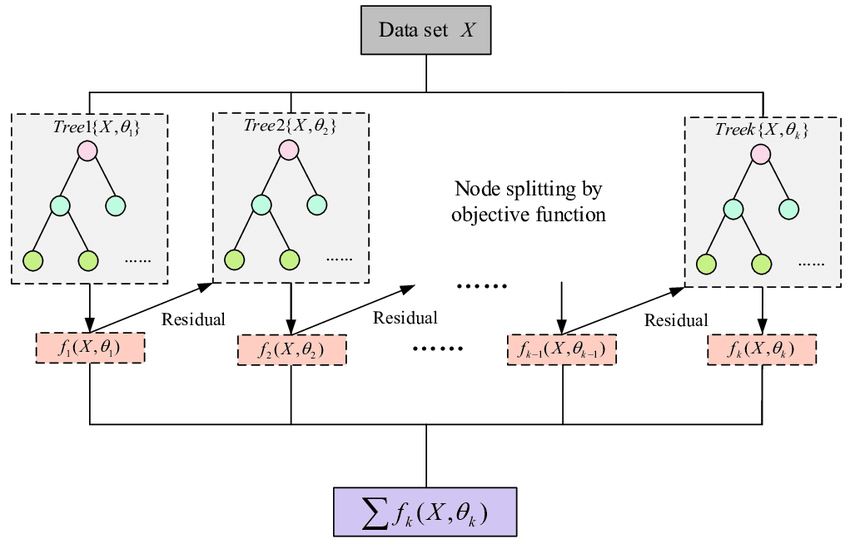



---



## **IMPORTING THE LIBRARIES**



---



**IMPORTING THE DATA SCIENCE LIBRARIES**

In [50]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import time

**IMPORTING THE ML / SCIKIT LEARN EVERYTHING**

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [52]:
from sklearn.model_selection import train_test_split               #for splitting the data into test and training data
from sklearn.compose import ColumnTransformer                       #for transforming the columns
from sklearn.impute import SimpleImputer                             #for imputing the missing values
from sklearn.preprocessing import OneHotEncoder                      #one hot encoding
from sklearn.preprocessing import MinMaxScaler                        #standard scaling
from sklearn.preprocessing import PowerTransformer
from scipy.stats import skew
from scipy import stats

from sklearn.datasets import load_diabetes

from sklearn.datasets import make_regression

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score


from sklearn.svm import SVR
import plotly.express as px
import plotly.graph_objects as go
from sklearn.datasets import make_classification

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score                 # for accuracy score
from sklearn.model_selection import cross_val_score        # for cross validation score

from sklearn.linear_model import LinearRegression           # Import the LinearRegression class
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error    # to find out the error functions
from sklearn.preprocessing import PolynomialFeatures , StandardScaler   # for the polunomial features
from sklearn.naive_bayes import GaussianNB

from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge   # ridge Regression
from sklearn.linear_model import LogisticRegression


from sklearn.tree import DecisionTreeClassifier                 #Decision tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier   # bagging and Boosting
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score   # different metrices to check how our model performed

**IMPORTING DEEP LEARNING EVERYTHING**

In [53]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

**IMPORTING MATHEMATICAL MODELS**

In [54]:
# prompt: import the mathematical testing framewroks

# Importing mathematical models
import math

from scipy import stats
from mlxtend.plotting import plot_decision_regions
from mlxtend.classifier import StackingClassifier
import scipy.stats as stats
import statsmodels.api as sm

from sklearn.datasets import make_circles



---



### **LOADING THE DATA**

In [55]:
from google.colab import files
uploaded = files.upload()

Saving Admission_Dataset.csv to Admission_Dataset (1).csv


In [56]:
df= pd.read_csv('Admission_Dataset.csv')



---



### **INFORMATION ABOUT THE DATA**

In [57]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [58]:
df.shape

(500, 9)

In [59]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [61]:
df.isnull().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


There is no null data present in our Dataset



---



### **DATA PREPROCESSING**

In [62]:
df.duplicated().sum()

0

**REMOVING OUTLIER**

In [63]:
#we will make a function removing outliers
def remove_outliers(df,columns):
    for col in columns:
        q1=df[col].quantile(0.25)
        q3=df[col].quantile(0.75)
        IQR=q3-q1
        low_bound=q1-1.5*IQR
        upp_bound=q3-1.5*IQR
        df=df[(df[col]>=low_bound)&(df[col]<=upp_bound)]
        return df
#in columns we will take a variable to put the columns we need to remove outliers from.
numerical_columns= [
    'GRE Score','TOEFL Score','SOP','LOR','CGPA','Chance of Admit'
]


numerical_columns = [col for col in numerical_columns if col in df.columns]

data = remove_outliers(df,numerical_columns)

**NORMALIZE SKEWED NUMERICAL FEATURES**

In [64]:
def normalize(df, columns):
  pt = PowerTransformer(method='yeo-johnson')
  for col in columns:
    skewness = skew(df[col])
    if abs(skewness) > 0.5:
        df[col] = pt.fit_transform(df[col].values.reshape(-1, 1))
  return df

In [65]:
label_encoders = {}
categorical_columns=['University Rating','Research'
]

for col in categorical_columns:
  le = LabelEncoder()
  data[col] = le.fit_transform(data[col])
  label_encoders[col]=le

<ipython-input-65-737e55417442>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = le.fit_transform(data[col])
<ipython-input-65-737e55417442>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = le.fit_transform(data[col])


In [66]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65




---



### **EXPLORATORY DATA ANALYSIS (EDA)**

**NUMERICAL FEATURES**

### **DISTRIBUTION PLOTS**

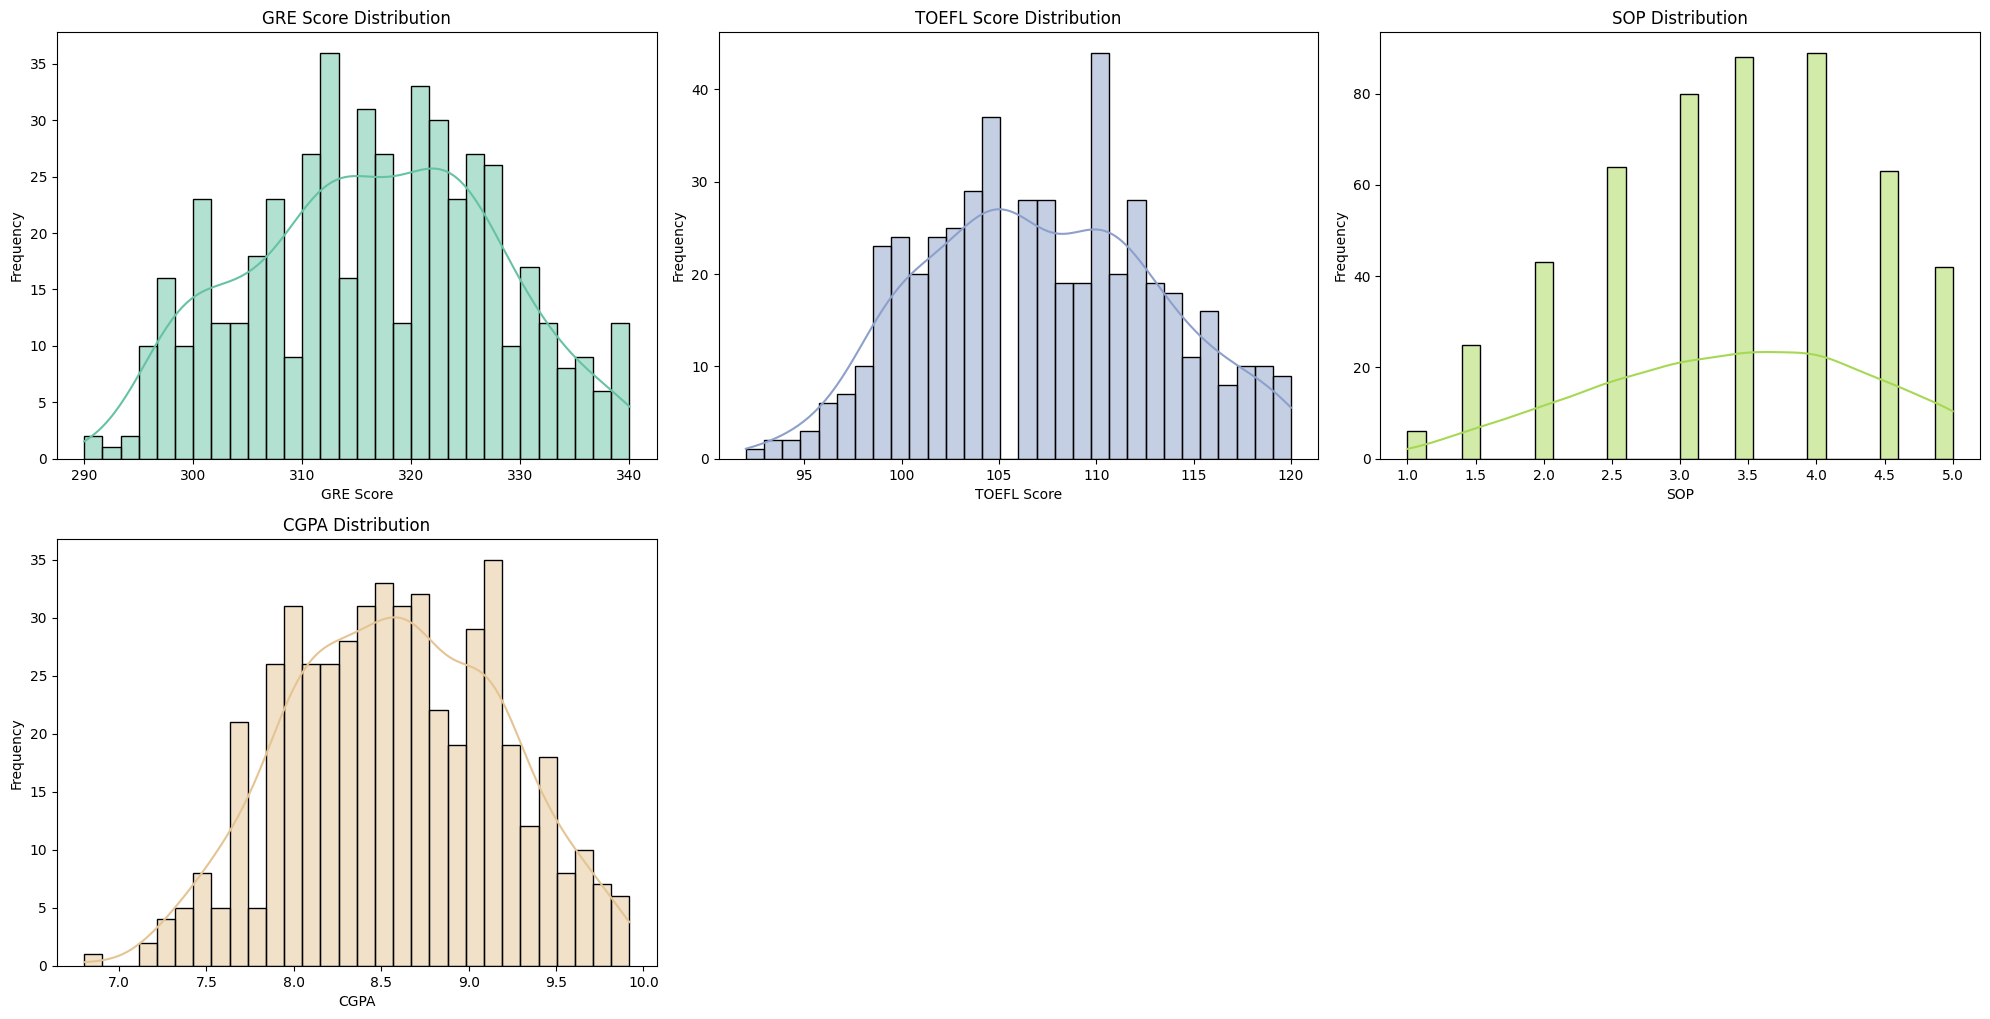

In [67]:
plt.figure(figsize=(20,20))
for i,col in enumerate(numerical_columns):
    plt.subplot(4,3,i+1)
    sns.histplot(df[col],bins=30,kde=True,color=plt.cm.Set2(i / len(numerical_columns)))
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### **BOX PLOTS**

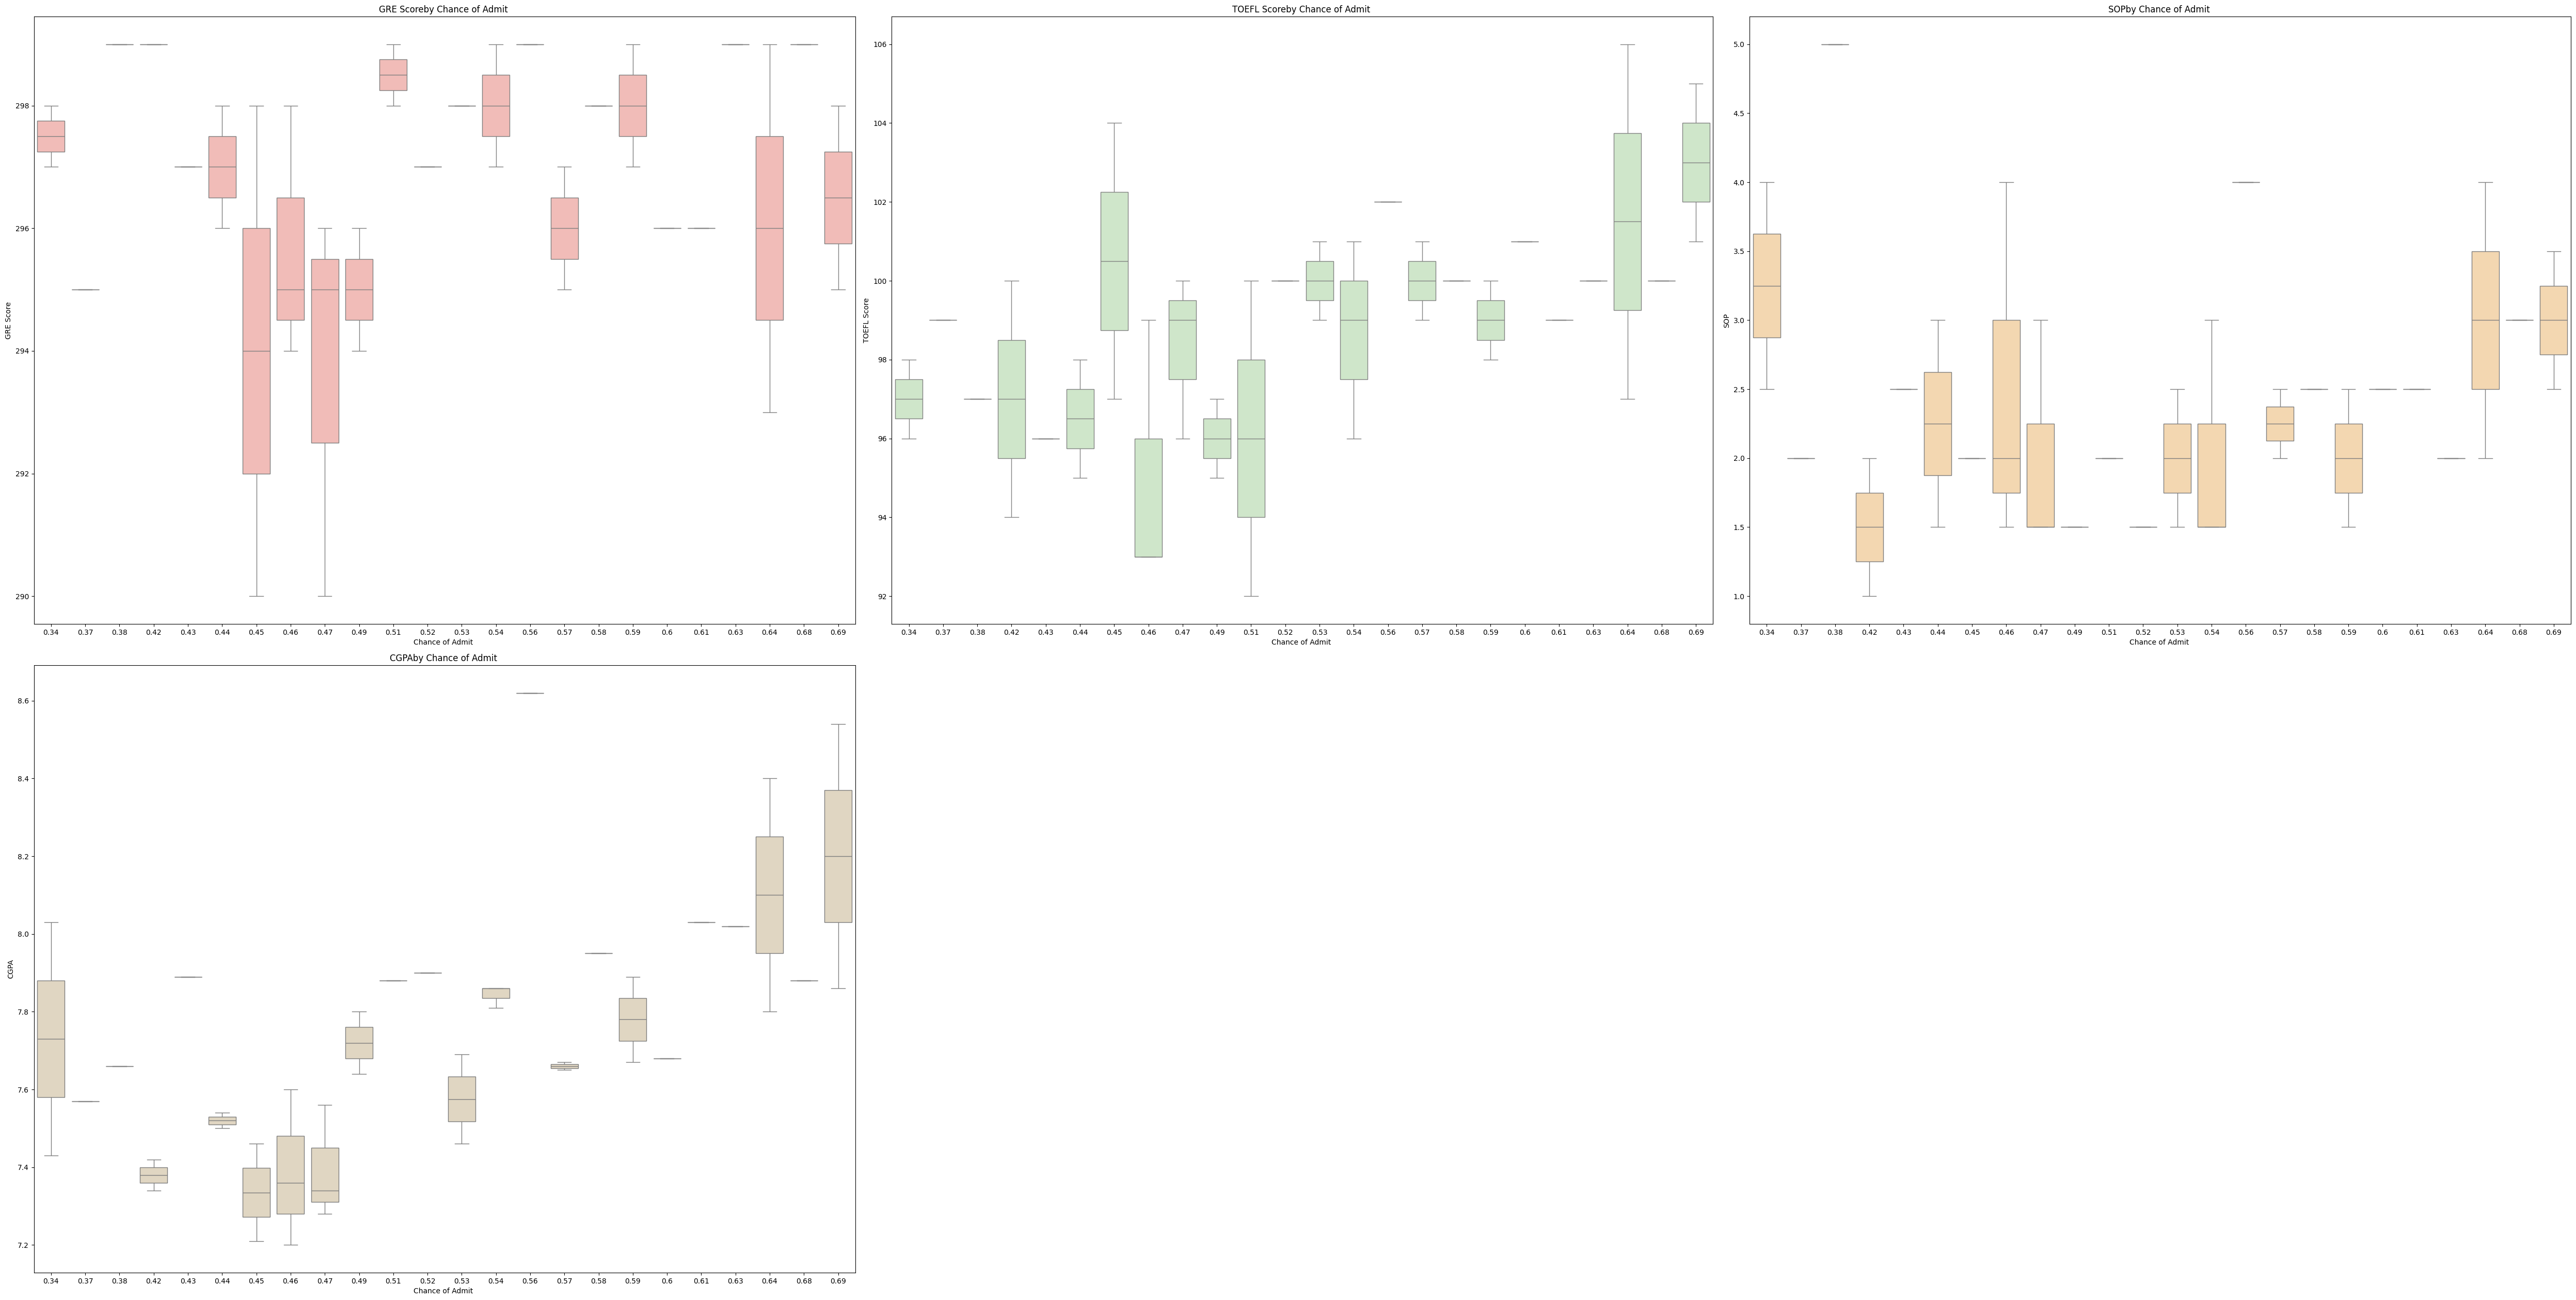

In [68]:
plt.figure(figsize=(50,50))
for i ,col in enumerate(numerical_columns):
    plt.subplot(4,3,i+1)
    sns.boxplot(x='Chance of Admit ',y=col,data=data, color=plt.cm.Pastel1(i / len(numerical_columns)))
    plt.title(f'{col}by Chance of Admit ')
    plt.xlabel('Chance of Admit ')
    plt.ylabel(col)

plt.tight_layout()
plt.show()



---



**CATEGORICAL FEATURES**

### **COUNT PLOT**

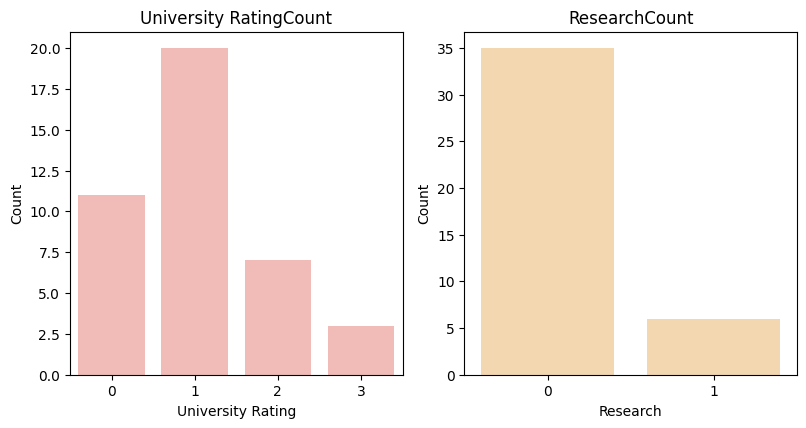

In [69]:
plt.figure(figsize=(20,20))
for i ,col in enumerate(categorical_columns):
    plt.subplot(5,5,i+1)
    sns.countplot(x=col,data=data,color=plt.cm.Pastel1(i / len(categorical_columns)))
    plt.title(f'{col}Count')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()



---



### **PAIR PLOT**

*RELATIONSHIP BETWEEN BOTH FEATURES*

<Figure size 1500x1500 with 0 Axes>

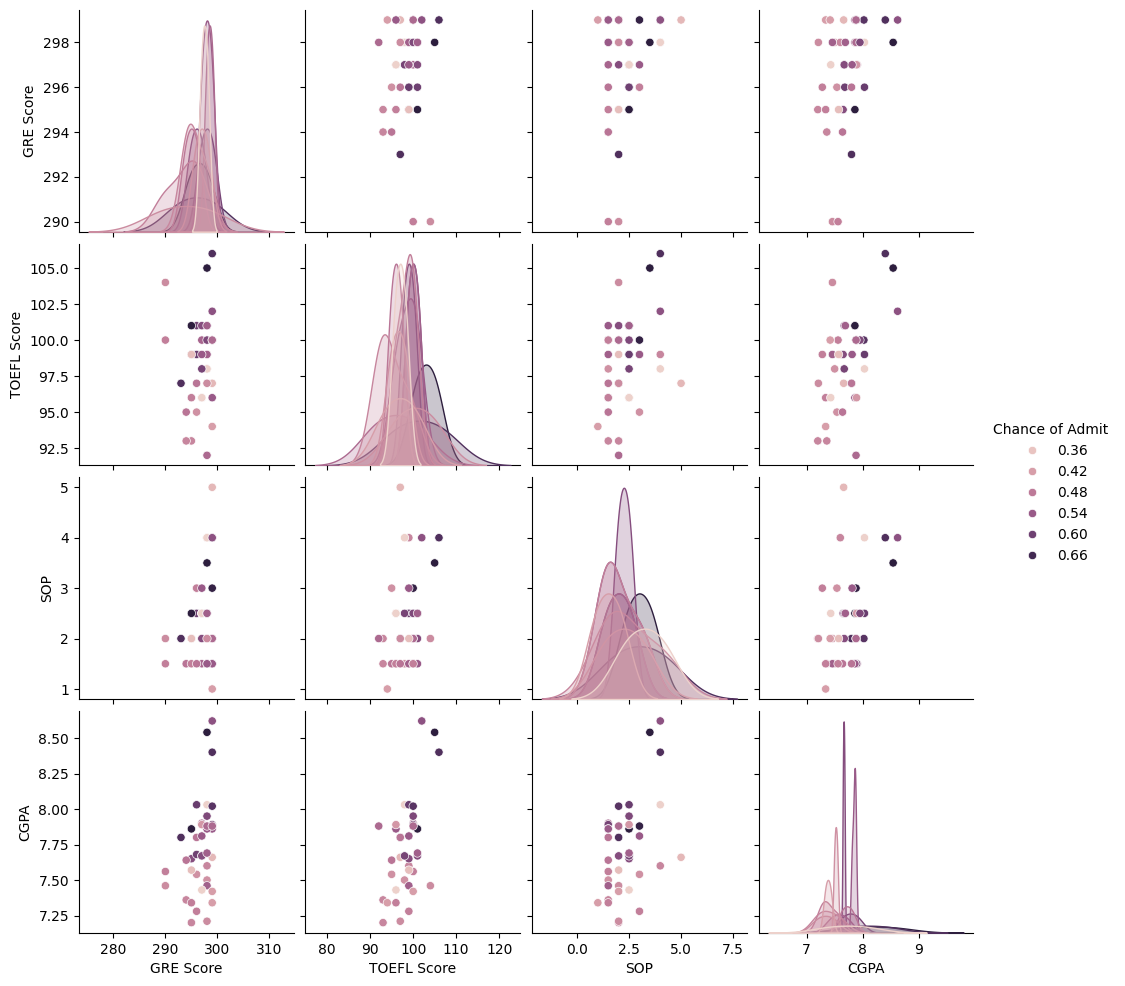

In [70]:
plt.figure(figsize=(15,15))
sns.pairplot(data[numerical_columns + ['Chance of Admit ']],hue='Chance of Admit ')
plt.show()

### **CORRELATION HEAT MAP**

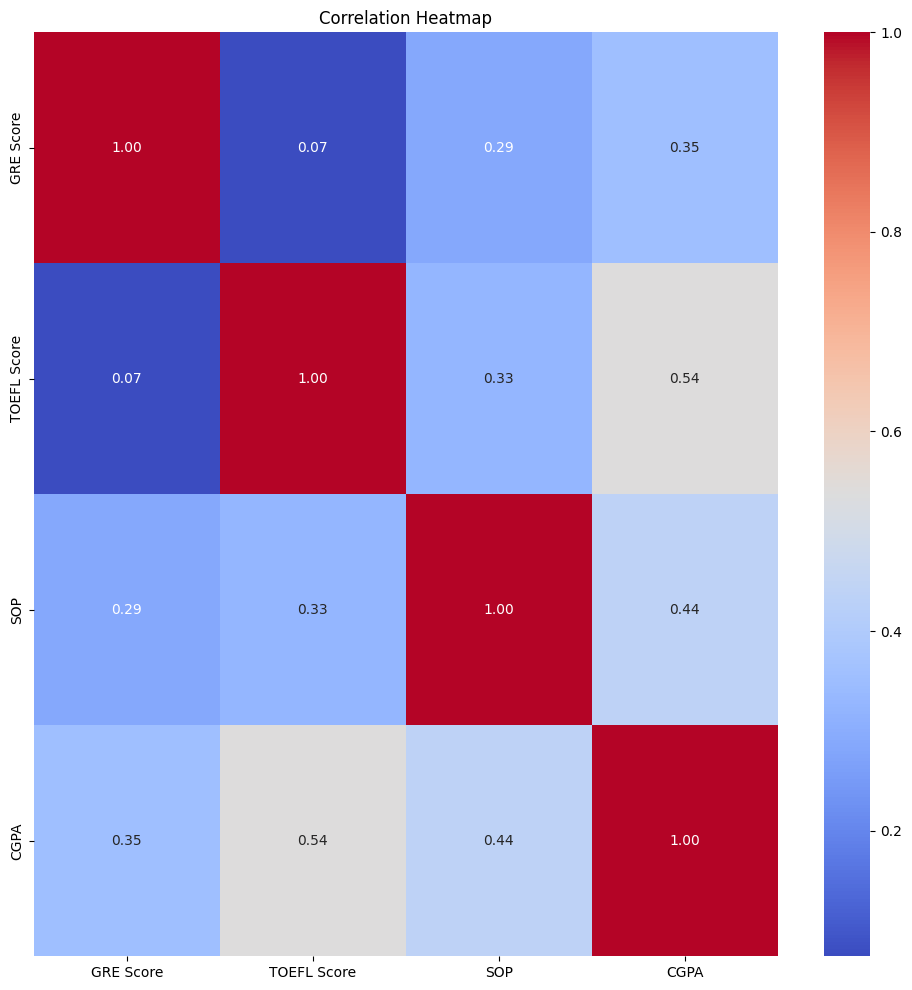

In [71]:
plt.figure(figsize=(12,12))
numeric_data = data[numerical_columns]
sns.heatmap(numeric_data.corr(),annot=True,cmap='coolwarm',fmt='.2f')

plt.title('Correlation Heatmap')
plt.show()



---



### **STATISTICAL TEST**

### ***T-TEST***

NUMERICAL FEATURES

In [72]:
for col in numerical_columns:
    positive_diagnosis = data[data['Chance of Admit '] == 1][col]
    negative_diagnosis = data[data['Chance of Admit '] == 0][col]
    t_stat, p_val = stats.ttest_ind(positive_diagnosis, negative_diagnosis) # Call the function using stats.ttest_ind
    print(f'T-Test for {col}: t-statistic = {t_stat}, p-value = {p_val}')

T-Test for GRE Score: t-statistic = nan, p-value = nan
T-Test for TOEFL Score: t-statistic = nan, p-value = nan
T-Test for SOP: t-statistic = nan, p-value = nan
T-Test for CGPA: t-statistic = nan, p-value = nan


### ***ANOVA***

FOR NUMERICAL FEATURES GROUPED BY CATEGORICAL FEATURES

In [73]:
for col in numerical_columns:
    for cat_col in categorical_columns:
        unique_groups = data[cat_col].unique()
        if len(unique_groups) >1:
            groups = [data[data[cat_col] == group][col] for group in unique_groups]
            f_stat, p_val = stats.f_oneway(*groups)
            print(f'ANOVA for {col} grouped by {cat_col}: F-statistic ={f_stat},p-value = {p_val}')

ANOVA for GRE Score grouped by University Rating: F-statistic =2.7563795870227574,p-value = 0.05600609281598604
ANOVA for GRE Score grouped by Research: F-statistic =0.017328657346430333,p-value = 0.895947114700617
ANOVA for TOEFL Score grouped by University Rating: F-statistic =3.683307391052815,p-value = 0.020388713918466375
ANOVA for TOEFL Score grouped by Research: F-statistic =0.0023755035980613107,p-value = 0.961375937432513
ANOVA for SOP grouped by University Rating: F-statistic =4.260994997498169,p-value = 0.011078957158774888
ANOVA for SOP grouped by Research: F-statistic =0.09190987596937154,p-value = 0.7633743817574241
ANOVA for CGPA grouped by University Rating: F-statistic =2.438710044913712,p-value = 0.07981980361656886
ANOVA for CGPA grouped by Research: F-statistic =0.08545725379426146,p-value = 0.7715833540274898




---



### **CORRELATION WITH CHANCE OF ADMIT**

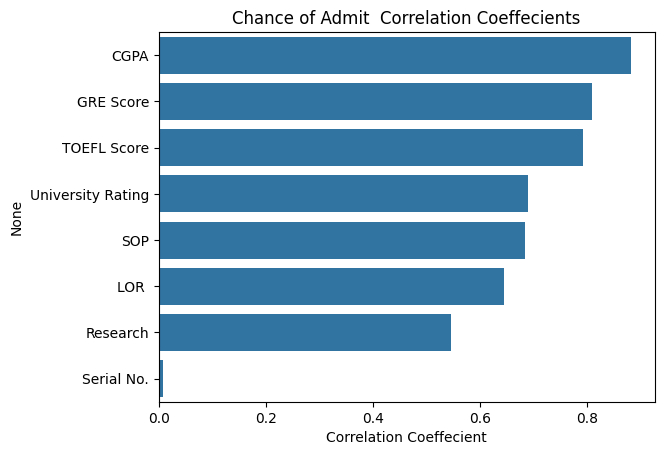

In [74]:
COA_corr = pd.DataFrame(df.corr()['Chance of Admit '])
COA_corr.rename({'Chance of Admit ': 'Correlation Coeffecient'}, axis=1, inplace=True)
COA_corr.drop('Chance of Admit ', inplace=True)
COA_corr.sort_values(['Correlation Coeffecient'], ascending=False, inplace=True)
COA_corr_x = COA_corr.index
COA_corr_y = COA_corr['Correlation Coeffecient']
sns.barplot(y=COA_corr_x,x=COA_corr_y).set_title('Chance of Admit  Correlation Coeffecients', size='12')
plt.show()

In [75]:
COA_corr

,Correlation Coeffecient
CGPA,0.882413
GRE Score,0.810351
TOEFL Score,0.792228
University Rating,0.690132
SOP,0.684137
LOR,0.645365
Research,0.545871
Serial No.,0.008505


### **MACHINE LEARNING**


### Regression and Classification Algorithms on the Entire Dataset

In [77]:
df['Admit_Decision'] = (df['Chance of Admit '] > 0.64).astype(int)

In [78]:
df['Admit2'] = (df['Chance of Admit '] * 10 + 0.5 ).astype(int)

In [79]:
df = df.drop(['Admit_prediction', 'Serial No.'], axis=1, errors='ignore')

In [80]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admit_Decision,Admit2
0,337,118,4,4.5,4.5,9.65,1,0.92,1,9
1,324,107,4,4.0,4.5,8.87,1,0.76,1,8
2,316,104,3,3.0,3.5,8.00,1,0.72,1,7
3,322,110,3,3.5,2.5,8.67,1,0.80,1,8
4,314,103,2,2.0,3.0,8.21,0,0.65,1,7


In [81]:
df['Admit2'].value_counts()

,count
Admit2,
7,136
8,109
9,92
6,85
5,45
10,17
4,14
3,2


In [82]:
df['Admit_Decision'].value_counts()

,count
Admit_Decision,
1,354
0,146


In [83]:
x= df.drop('Admit_Decision',axis=1)
y= df['Admit_Decision']

 **TRAIN TEST SPLIT**

In [84]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [85]:
# Apply Regression  Learning Models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVM': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Neural Network': MLPRegressor(max_iter=50)

}


In [86]:
results = []

for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    #y_proba = model.predict_proba(X_test)#[:, #0]

    results.append({
        'Model': model_name,

        'R2_score': r2_score(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': mean_squared_error(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred)
    })

results_df = pd.DataFrame(results)
results_df.sort_values(by='R2_score', ascending=False, inplace=True)

results_df

,Model,R2_score,MSE,RMSE,MAE
4,Decision Tree,1.000000,0.000000e+00,0.000000e+00,0.000000
5,Random Forest,1.000000,0.000000e+00,0.000000e+00,0.000000
7,Gradient Boosting,1.000000,1.543828e-10,1.543828e-10,0.000011
1,Ridge Regression,0.637941,7.878394e-02,7.878394e-02,0.245404
0,Linear Regression,0.633585,7.973193e-02,7.973193e-02,0.246830
3,ElasticNet Regression,0.295593,1.532789e-01,1.532789e-01,0.326269
2,Lasso Regression,0.288092,1.549113e-01,1.549113e-01,0.334756
6,SVM,0.154927,1.838878e-01,1.838878e-01,0.316432
8,Neural Network,-3.975831,1.082741e+00,1.082741e+00,0.895769



### **Classification Model ( Supervised Machine Learning )**

In [87]:
# Apply Classification  Learning Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=50),
    'Decision Tree': DecisionTreeClassifier(max_depth=8),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Neural Network': MLPClassifier(max_iter=50),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'XGBoost' : XGBClassifier()
}

In [88]:
results = []

for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_proba = model.predict_proba(x_test)[:, 0]

    results.append({
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),

        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted'),

        'ROC-AUC': roc_auc_score(y_test, y_proba, multi_class='ovr' , average='weighted' )
    })

results_df = pd.DataFrame(results)
results_df.sort_values(by='ROC-AUC', ascending=False, inplace=True)

results_df

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and 

,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
3,SVM,0.68,0.462400,0.68,0.550476,0.139706
6,K-Nearest Neighbors,0.83,0.828724,0.83,0.829271,0.116498
5,Neural Network,0.76,0.822609,0.76,0.706000,0.083640
0,Logistic Regression,0.99,0.990303,0.99,0.990040,0.000919
1,Decision Tree,1.00,1.000000,1.00,1.000000,0.000000
2,Random Forest,1.00,1.000000,1.00,1.000000,0.000000
4,Gradient Boosting,1.00,1.000000,1.00,1.000000,0.000000
7,Extra Trees,1.00,1.000000,1.00,1.000000,0.000000
8,XGBoost,1.00,1.000000,1.00,1.000000,0.000000


### **ALOGORITHM ON SELECTIVE COLUMNS**

**Regression Model ( Supervised Machine Learning )**

In [89]:
X = df.drop(['Admit_Decision','Research','SOP','Admit2'], axis=1)
y = df['Admit_Decision']

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
# Apply Regression  Learning Models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVM': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Neural Network': MLPRegressor(max_iter=50)

}

In [92]:
import sklearn.metrics as metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    #y_proba = model.predict_proba(X_test)#[:, #0]

    results.append({
        'Model': model_name,

        'R2_score': r2_score(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': mean_squared_error(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred)
    })

results_df = pd.DataFrame(results)
results_df.sort_values(by='R2_score', ascending=False, inplace=True)

results_df

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


,Model,R2_score,MSE,RMSE,MAE
4,Decision Tree,1.000000,0.000000e+00,0.000000e+00,0.000000
5,Random Forest,1.000000,0.000000e+00,0.000000e+00,0.000000
7,Gradient Boosting,1.000000,1.543828e-10,1.543828e-10,0.000011
0,Linear Regression,0.608670,8.515331e-02,8.515331e-02,0.253371
1,Ridge Regression,0.578055,9.181526e-02,9.181526e-02,0.263081
3,ElasticNet Regression,0.295593,1.532789e-01,1.532789e-01,0.326269
2,Lasso Regression,0.288092,1.549113e-01,1.549113e-01,0.334756
6,SVM,0.157612,1.833037e-01,1.833037e-01,0.318046
8,Neural Network,-0.023207,2.226499e-01,2.226499e-01,0.415685


**Classification Model ( Supervised Machine Learning )**

In [93]:
# Apply Classification  Learning Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=50),
    'Decision Tree': DecisionTreeClassifier(max_depth=8),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Neural Network': MLPClassifier(max_iter=50),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'XGBoost' : XGBClassifier()
}

In [94]:
results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 0]

    results.append({
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),

        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted'),

        'ROC-AUC': roc_auc_score(y_test, y_proba, multi_class='ovr' , average='weighted' )
    })

results_df = pd.DataFrame(results)
results_df.sort_values(by='ROC-AUC', ascending=False, inplace=True)

results_df

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and 

,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
5,Neural Network,0.68,0.462400,0.68,0.550476,0.778952
6,K-Nearest Neighbors,0.80,0.797143,0.80,0.798223,0.184743
3,SVM,0.68,0.462400,0.68,0.550476,0.150276
0,Logistic Regression,0.90,0.912821,0.90,0.894165,0.063419
7,Extra Trees,0.96,0.960190,0.96,0.959645,0.004366
1,Decision Tree,1.00,1.000000,1.00,1.000000,0.000000
2,Random Forest,1.00,1.000000,1.00,1.000000,0.000000
4,Gradient Boosting,1.00,1.000000,1.00,1.000000,0.000000
8,XGBoost,1.00,1.000000,1.00,1.000000,0.000000


### **CONFUSION MATRIX**

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


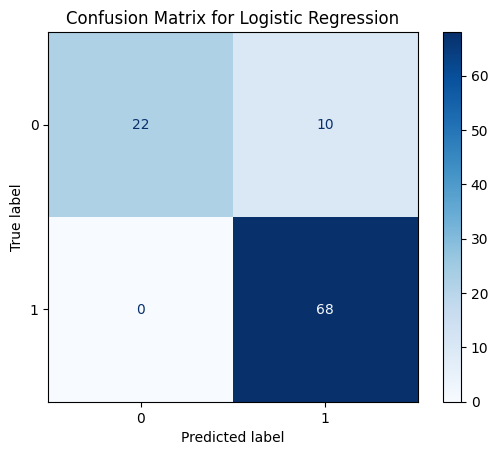

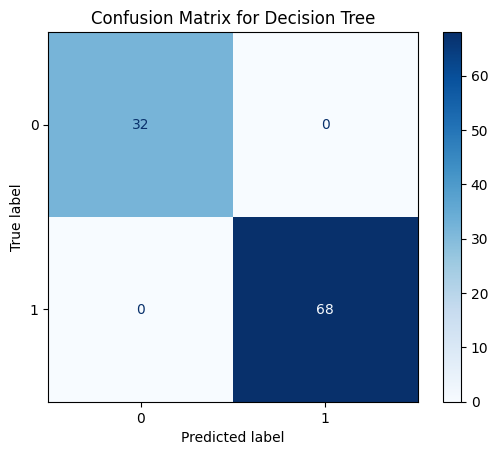

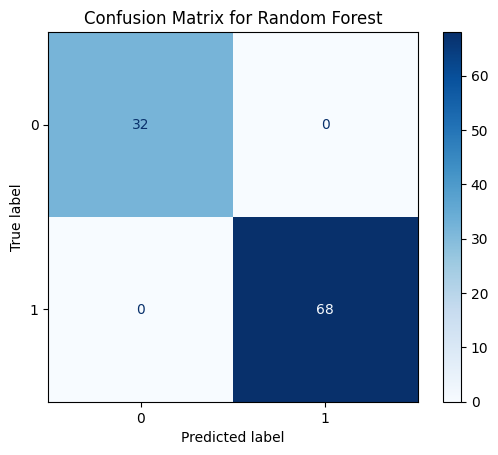

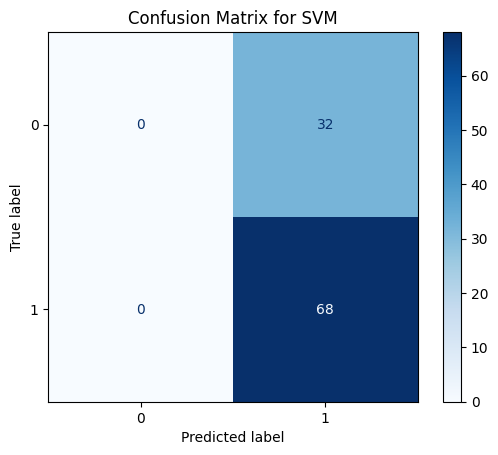

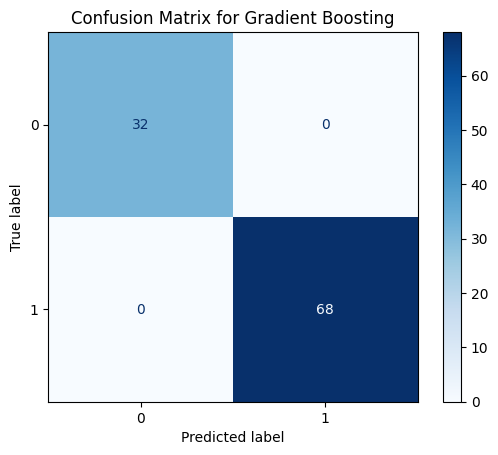

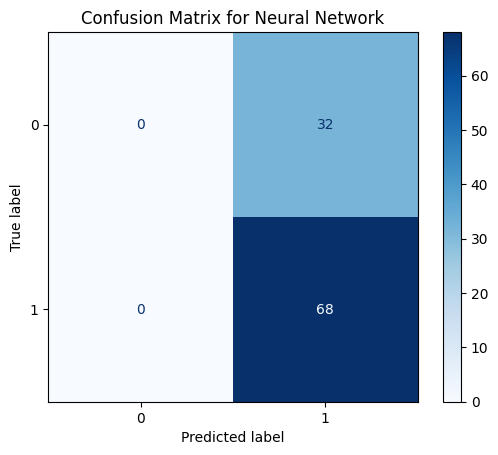

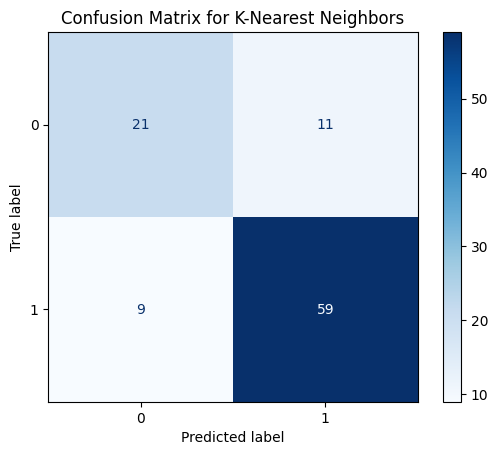

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

results = []

for model_name, model in models.items():         #fitting , predicting and probablity
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 0] if hasattr(model, "predict_proba") else None


    cm = confusion_matrix(y_test, y_pred)          # creating our C matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)  # displaying it


    disp.plot(cmap='Blues', ax=plt.gca())           # displaying the 6 graphs
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()